In [1]:
import os, shutil

#Creating the necessary directories for copying images to training, validation and test directories
original_dataset_dir = '/home/joel/Dogs_vs_Cats_Dataset/train'

base_dir = '/home/joel/Dogs_vs_Cats_Dataset_small'
#os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)


test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

#Copying the first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

#Copying the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

#Copying the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#Copying the first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
#Copying the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
#Copying the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
from keras import layers
from keras import models

#Building the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

Using TensorFlow backend.


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [4]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics = ['acc'])

In [5]:
from keras.preprocessing.image import ImageDataGenerator

#Using ImageDataGenerator to read images from directories
#Rescaling all images bi 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150),
                                                    batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150),
                                                        batch_size=29, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
#Printing the shape of the reshaped images
for data_batch, labels_batch in train_generator:
    print('Data batch shape:', data_batch.shape)
    print('Labels batch shape:', labels_batch.shape)
    break

Data batch shape: (20, 150, 150, 3)
Labels batch shape: (20,)


In [7]:
#Fitting the model using a batch generator
#Since the batch size is 20 and we have 2000 train images, we have 100 steps per epoch
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
                              validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 12s 124ms/step - loss: 0.6920 - acc: 0.5080 - val_loss: 0.6796 - val_acc: 0.5993
Epoch 2/30
100/100 [==============================] - 11s 105ms/step - loss: 0.6642 - acc: 0.6045 - val_loss: 0.6701 - val_acc: 0.5909
Epoch 3/30
100/100 [==============================] - 10s 105ms/step - loss: 0.6125 - acc: 0.6695 - val_loss: 0.6111 - val_acc: 0.6739
Epoch 4/30
100/100 [==============================] - 10s 104ms/step - loss: 0.5755 - acc: 0.7010 - val_loss: 0.6005 - val_acc: 0.6648
Epoch 5/30
100/100 [==============================] - 10s 105ms/step - loss: 0.5376 - acc: 0.7235 - val_loss: 0.6341 - val_acc: 0.6514
Epoch 6/30
100/100 [==============================] - 11s 106ms/step - loss: 0.5144 - acc: 0.7415 - val_loss: 0.6127 - val_acc: 0.6732
Epoch 7/30
100/100 [==============================] - 10s 103ms/step - loss: 0.4776 - acc: 0.7665 - val_loss: 0.5982 - val_acc: 0.6725
Epoch 8/30
100/100 [==============================] - 1

In [8]:
model.save('cats_and_dogs_small_1.h5')

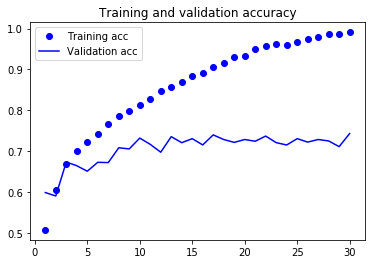

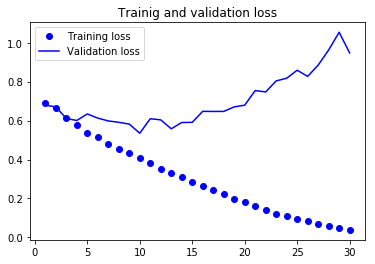

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss =history.history['val_loss']

epochs = range(1, len(acc)+1)

#Plotting training and validation accuracy
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

#creating a new figure
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Trainig and validation loss')
plt.legend()

plt.show()

In [11]:
#Data augmentation via ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                             shear_range=0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')

In [12]:
#Displaying augmented images
from keras.preprocessing import image #Module with image preprocessing utilities

def augmented_images(z):
    fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

    img_path = fnames[z] #choosing one image to augment

    img = image.load_img(img_path, target_size=(150,150)) #Reading and resizing the image

    x = image.img_to_array(img) #converts the image to a np array with shape (150,150,3)

    x = x.reshape((1,) + x.shape) #reshape to (1,150,150,3)

    i = 0
    for batch in datagen.flow(x, batch_size=1):
        plt.figure(i)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 4 == 0:
            break

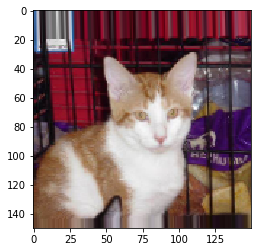

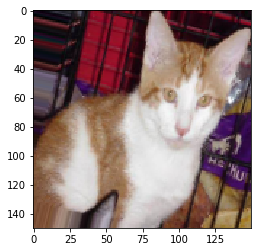

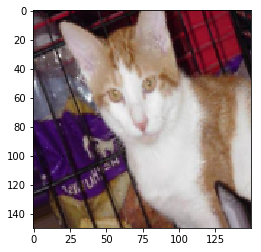

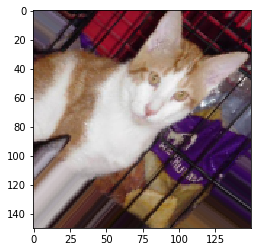

In [13]:
augmented_images(800)

In [14]:
#Defining a new model using Dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

W0513 16:12:03.000043 140713961457408 deprecation.py:506] From /home/joel/anaconda3/envs/tensorflow-gpu-3-5-2/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
#Training the convnet using data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=validation_generator, validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 24s 242ms/step - loss: 0.6871 - acc: 0.5291 - val_loss: 0.6890 - val_acc: 0.5374
Epoch 2/100
100/100 [==============================] - 22s 218ms/step - loss: 0.6785 - acc: 0.5581 - val_loss: 0.6557 - val_acc: 0.6082
Epoch 3/100
100/100 [==============================] - 22s 219ms/step - loss: 0.6620 - acc: 0.5950 - val_loss: 0.6686 - val_acc: 0.5768
Epoch 4/100
100/100 [==============================] - 22s 220ms/step - loss: 0.6399 - acc: 0.6291 - val_loss: 0.6232 - val_acc: 0.6263
Epoch 5/100
100/100 [==============================] - 22s 220ms/step - loss: 0.6312 - acc: 0.6372 - val_loss: 0.5961 - val_acc: 0.6662
Epoch 6/100
100/100 [==============================] - 22s 221ms/step - loss: 0.6078 - acc: 0.6547 - val_loss: 0.6025 - val_acc: 0.6611
Epoch 7/100
100/100 [==============================] - 22s 218ms/step - loss: 0.5953 - acc: 0.6784 -

100/100 [==============================] - 22s 219ms/step - loss: 0.4239 - acc: 0.8009 - val_loss: 0.4366 - val_acc: 0.7970
Epoch 61/100
100/100 [==============================] - 22s 221ms/step - loss: 0.4111 - acc: 0.8112 - val_loss: 0.4956 - val_acc: 0.7571
Epoch 62/100
100/100 [==============================] - 22s 220ms/step - loss: 0.4138 - acc: 0.8072 - val_loss: 0.4553 - val_acc: 0.7881
Epoch 63/100
100/100 [==============================] - 22s 220ms/step - loss: 0.4139 - acc: 0.8047 - val_loss: 0.4348 - val_acc: 0.8015
Epoch 64/100
100/100 [==============================] - 22s 218ms/step - loss: 0.3931 - acc: 0.8294 - val_loss: 0.4700 - val_acc: 0.7796
Epoch 65/100
100/100 [==============================] - 22s 219ms/step - loss: 0.4164 - acc: 0.8103 - val_loss: 0.4550 - val_acc: 0.7817
Epoch 66/100
100/100 [==============================] - 22s 219ms/step - loss: 0.4150 - acc: 0.8009 - val_loss: 0.4145 - val_acc: 0.8157
Epoch 67/100
100/100 [==============================] 